In [1]:
from coptpy import *
import numpy as np
import matplotlib.pyplot as plt
import igraph
import networkx as nx
import matplotlib.pyplot as plt
import math
from networkx.algorithms.traversal.depth_first_search import dfs_tree

In [2]:
rnd = np.random
rnd.seed(0)

In [3]:
def create_random_tree(num_nodes, min_children=1, max_children=5, seed=0):
    rnd = np.random.RandomState(seed)
    tree = nx.Graph()
    tree.add_node(0)

    current_node = 0
    node_counter = 1

    nodes_to_expand = [0]

    while nodes_to_expand and node_counter < num_nodes:
        node = nodes_to_expand.pop(0)
        num_children = rnd.randint(min_children, max_children + 1)
        
        for _ in range(num_children):
            if node_counter >= num_nodes:
                break

            tree.add_edge(node, node_counter)
            nodes_to_expand.append(node_counter)
            node_counter += 1

    return tree

In [4]:
n = 40 #Count of nodes

#xc yc
xc = rnd.rand(n+1)*200
yc = rnd.rand(n+1)*100



graph = create_random_tree(n+1)

for i,j in graph.edges():
    graph.edges[i,j]["weight"] =  math.ceil(np.hypot(xc[i] - xc[j],yc[i] - yc[j]))
print(graph.edges())

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 6), (2, 7), (2, 8), (2, 9), (2, 10), (3, 11), (3, 12), (3, 13), (3, 14), (4, 15), (4, 16), (4, 17), (4, 18), (5, 19), (5, 20), (6, 21), (6, 22), (6, 23), (6, 24), (7, 25), (7, 26), (7, 27), (8, 28), (8, 29), (8, 30), (8, 31), (8, 32), (9, 33), (10, 34), (11, 35), (11, 36), (11, 37), (11, 38), (11, 39), (12, 40)]


In [5]:
#Initialize
C = 100
A = [(i,j) for i,j in graph.edges()]
N = [i for i in range(1,n+1)]
L = dict(nx.shortest_path_length(graph, weight='weight'))
D = {i: rnd.randint(10,100) for i in N}
P = {j: i for i,j in A}
c = {}
c = {i:[] for i in range(0,n+1)}
for i,j in A:
    c[i].append(j)

sum_dem = 0
for i in D:
    sum_dem +=D[i]
V_min = math.ceil(sum_dem/C)
V = []
for i in range(1,V_min+1):
    V.append(i)


In [6]:
env = Envr()
model = env.createModel()

Cardinal Optimizer v6.0.5. Build date Feb  7 2023
Copyright Cardinal Operations 2022. All Rights Reserved



In [7]:
x = model.addVars(A,V, vtype=COPT.BINARY)
y = model.addVars(N, V, vtype=COPT.BINARY)

In [8]:
model.setObjective(2 * (quicksum(L[i][j]*quicksum(x[i,j,v] for v in V) for i,j in A )),COPT.MINIMIZE)

In [9]:
#constr 1
for v in V:
    for i in N:
        if c[i]:
            for j in c[i]:
                 model.addConstr(x[P[i],i,v] >=x[i,j,v])

#constr 2
for i in N:
    for v in V:
        model.addConstr(x[P[i],i,v] >=y[i,v])
        
##constr 3 
for v in V:
        model.addConstr(quicksum(y[i,v]*D[i] for i in N) <= C )
#constr 4
for i in N:
    model.addConstr(quicksum(y[i,v] for v in V) == 1)
        

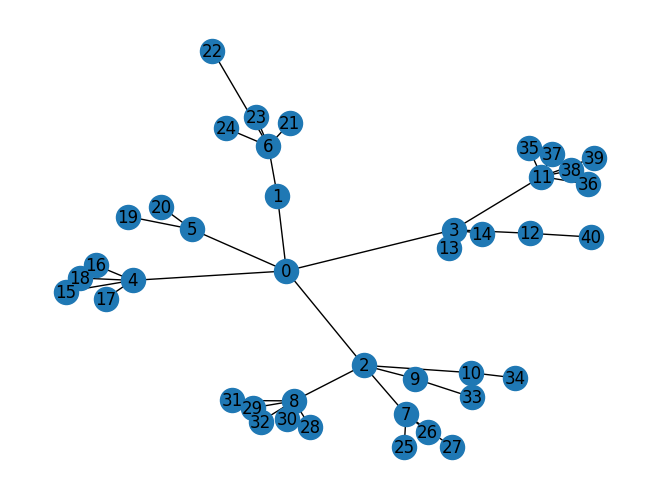

In [10]:

nx.draw(graph,with_labels=True)
plt.show()

In [11]:
model.setParam(COPT.Param.TimeLimit, 500.0)

Setting parameter 'TimeLimit' to 500


In [12]:
model.solve()

Model fingerprint: 16d4abf9

Using Cardinal Optimizer v6.0.5 on Windows
Hardware has 6 cores and 12 threads. Using instruction set X86_NATIVE (1)
Minimizing a MIP problem

The original problem has:
    1636 rows, 1680 columns and 4830 non-zero elements
    1680 binaries

Presolving the problem

The presolved problem has:
    754 rows, 1071 columns and 3339 non-zero elements
    1071 binaries

Starting the MIP solver with 12 threads and 32 tasks

     Nodes    Active  LPit/n  IntInf     BestBound  BestSolution    Gap   Time
         0         1      --       0  0.000000e+00            --    Inf  0.04s
         0         1      --     295  7.816000e+03            --    Inf  0.05s
         0         1      --     197  7.816000e+03            --    Inf  0.13s
         0         1      --     209  7.816000e+03            --    Inf  0.17s
         0         1      --     240  7.816000e+03            --    Inf  0.24s
         0         1      --     287  7.816000e+03            --    Inf  0.2